Python Workshop 2020 Session II - Projects
===
@Feitian College, Middletown NY



---

Python Packages
===


In [0]:
#Zen of Python
import this

In [0]:
# Set up packages/libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


# Proj 1- Rolling Dices to Compute $\pi$

### Monte Carlo estimation

Monte Carlo methods are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. One of the basic examples of getting started with the Monte Carlo algorithm is the estimation of $\pi$.

### Estimation of $\pi$
The idea is to simulate random (x, y) points in a 2-D plane with domain as a square of side 2 unit. Imagine a circle inside the same domain with same diameter and inscribed into the square. We then calculate the ratio of number points that lied inside the circle and total number of generated points. Refer to the image below (**we will learn how to create the plot later**):
 

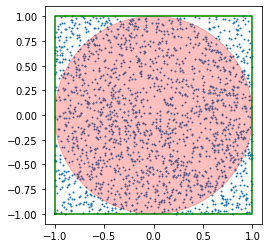

In [0]:
#@title Code { form-width: "10%" }
import random
import math
X, Y = [], []
for j in range(2000):
    x = random.random()*2-1
    y = random.random()*2-1
    X.append(x)
    Y.append(y)
fig, ax = plt.subplots()
plt.scatter(X,Y, s=1)
plt.plot([-1,1,1,-1,-1],[-1,-1,1,1,-1], color='green')
ax.add_patch(plt.Circle((0, 0), 1, color='r', alpha=0.25))
ax.set_aspect('equal')
plt.show()

We know that area of the square is $2^{2}=4$ $unit^2$  while that of circle is $\pi *  1^{2} = {\pi}$. Now for a very large number of generated points,

$$ \frac{area\; of\; the \;circle}{area\; of\; the \;square} = \frac{\pi}{4} \approx \frac{number\; of\; points\; within\; the\; circle}{total\; number\; of points\; within\; the\; square} . 
$$

The Algorithm

0. Initialize variables `counter_circle`, `counter_square` both to be 0.
1. Start a for-loop, with `nloops` iterations (`n_loops` is a user prescribed integer number, it might be, say, 5000, or even larger).
  1. Generate a random point x $\in$ (0,1).
  3. Generate a random point y $\in$ (0,1).
  4. Convert x, y such that x, y $\in$ (-1,1).
```python
x = x*2 - 1
y = y*2 - 1
```
  4. Calculate $d = x*x + y*y$
  6. Increment `counter_square`.
  5. If d <= 1, increment `counter_circle`.
10. end of loop.
11. Compute and print estimation of $\pi$:
$$
4*\frac{counter\_circle}{counter\_square}
$$

You will write a function 
```python
def compute_pi(nloops):
    pass
```
To implement above algorithm in python to compute $\pi$. You will want to call your function with different nloops:
```python
compute_pi(5000)
compute_pi(100000)
...
```
and compare the precision of your estimation of $\pi$.

Before you start, you need to play around with following functions in python:

* Run cells below:

In [0]:
import random
# Above import statements allow us to access following functions:

In [0]:
# Try to click running statements below multiple times:
x = random.random()
y = random.random()

print(x, y)

0.06893501574763294 0.6181133115274025


## random function

You guessed right - `random() ` function inside `random` package - which we write as `random.random()` will generate a random number uniformly distributed between 0 and 1 (not including 0 or 1) everytime you call the function.

Run cell below to read documentation:

In [0]:
?random.random

In [0]:
# This is equavalent:
print(random.random.__doc__)

random() -> x in the interval [0, 1).


In [0]:
# Run cell below --
import math
c = math.sqrt(2.0)
d = math.sqrt(4.0)
print(c, d, math.pi)


1.4142135623730951 2.0 3.141592653589793


As you can see, math package contains many useful functions and constants and we are using sqrt() which computes square root of the given number.

Small challenge, `math.pi` gives us $\pi$, guess how you can get $e$ the base of natural log?

Next you want to get your self familiar with loop:

In [0]:
nLoop = 10
for j in range(nLoop):
    x = random.random()
    # do some thing else.
    print (x)


0.2752411322161643
0.47026958005969066
0.252360796700567
0.08275384548188924
0.6287018512337101
0.3274574166946208
0.016188893427963147
0.9123562905652172
0.7446906362376194
0.48835255397754607


## Now it's your turn to write your own function :

In [0]:
def compute_pi(nloops):
    pass

In [0]:
# Try your function with different input nloops:
compute_pi(5000)
compute_pi(100000)

#### Can you improve your code such that instead of taking an arguement for number of loops, it takes an accuracy arguement and automatically stops the loop when reaching certain accuracy?

**Hint** You want to use while loop and stop when accuracy is reached.


In [0]:
def compute_pi(accuracy):
    pass
    # if accuracy is 0.01, loop stops when estimation is close to 3.14:
    #      abs(estimated_pi - math.pi) < 0.01
    # if accuracy is 0.001, loop stops when estimation is close to 3.142
    #      abs(estimated_pi - math.pi) < 0.001
    # etc.

Fun time! Write your function to make plots!
===

- Now run the code cell below to create plot.
- Observe how the information about "New York" state get into the plot.


In [0]:
# Set up
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
import datetime, pickle
# Download latest data
!rm -f US_confirmed-covid19.pkl
!wget https://github.com/quz2004/py2020/raw/master/US_confirmed-covid19.pkl

In [0]:
#@title Code { form-width: "10%" }

today = datetime.date.today()

# 1. read data
data = pickle.load(open('US_confirmed-covid19.pkl', 'rb'))

# 2. Create Figure
p = figure(plot_width = 600, plot_height = 400, 
           x_range=(datetime.date(2020,3,5), today),
           x_axis_type='datetime', title = 'Confirmed COVID-19 cases for NY')
# 3. Add Glyphs
x = data['Time']
y = data['New York']
p.circle(x, y, color = 'red',  alpha = 0.3, size = np.log(y+.001)*2)
p.xaxis.axis_label = 'Time'
# 4. Show the plot
output_notebook()
show(p)

Your Turn!
===
Copy/paste the code cell above, then modify it to plot another US state, say "California", run this will show available states:
```python
data.keys()
```

Play around to change parameters like colors, circle sizes etc.

In [0]:
# Your turn to make a new plot for a different state

Some Improvements: More Interactive
===
Run the cell below to make a plot with hover tooltip show numbers when mouse over the circles.


In [0]:
#@title Code { form-width: "10%" }

from bokeh.io import show, output_notebook
from bokeh.plotting import figure
import datetime 
from bokeh.models import ColumnDataSource, HoverTool

# Convert dataframe to column data source
x = data['Time']
y = data['New York']
src = ColumnDataSource(data=dict(x=x, 
                                 y=y, 
                                 size = np.log(y.values+1)*2,
                                 Date=list(x.dt.strftime('%Y-%m-%d'))))

today = datetime.date.today()
# Add a hover tool referring to the formatted columns
hover = HoverTool(tooltips = [('Date', '@Date'),
                             ('Confirmed', '@y')])
# 2. Create Figure
p = figure(plot_width = 600, plot_height = 400, 
           x_axis_type='datetime', 
           x_range=(datetime.date(2020,3,5), today),
           title = 'Confirmed COVID-19 cases for NY')
# 3. Add Glyphs
p.circle(source = src, x='x', y='y', 
         line_color="#FF0000", 
         fill_color="#FF0000",
         alpha = 0.3, size = 'size')

p.xaxis.axis_label = 'Time'




# Add the hover tool to the graph
p.add_tools(hover)


output_notebook()
show(p)


Your Turn: Make Your Own Plotting function
===

Please use the code above and make it as a function:
```python
def COVID19_plot(state=???):
  pass 
  #your code

````
Your function should satisfy follow requirements:

1. When called with a string arguement for a US state it plots COVID-19 data for that state. e.g., when called with
```python
COVID19_plot('California')
```
It should plot data for California;

2. When called with no arguement, it will make a plot for New York state:
```python
COVID19_plot()
# do same thing as 
# COVID19_plot('New York')
```

In [0]:
#Your function starts here
